# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [16]:
medical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__As can be seen from the histogram, the distribution of charges has a long right tail. So it is not a normal distribution.
The mean is impacted by large no. of patitents with charges below 10k. The standard deviation of 12,105 and mean of 13,270 also indicate that the distribution is not normal, as there are no values more than 1.1 std. deviation left of the mean.

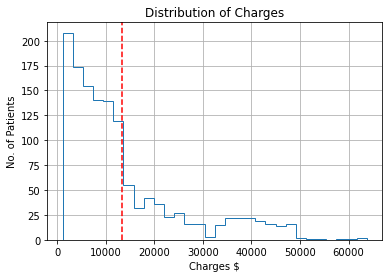

The average charge per patients is: $13270.42
The standard deviation of the charges is: $12110.01


In [7]:
avg_charges = np.mean(medical.charges)
charges_std = np.std(medical.charges, ddof=1)

_ = medical.charges.hist(histtype='step',bins = 30)
_ = plt.xlabel('Charges $')
_ = plt.ylabel('No. of Patients')
_ = plt.title('Distribution of Charges')
_ = plt.axvline(avg_charges,color='r',linestyle='--')
plt.show()

print(f"The average charge per patients is: ${avg_charges:3.2f}")
print(f"The standard deviation of the charges is: ${charges_std:3.2f}")

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__We have a sufficiently large sample of 1338 patients. By using a t-distribution, we can calculate the 95% confidence interval and hence have a fairly good idea of the range in which the actual average charges could lie. 
The most appropriate test would be the 95% confidence interval.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__The appropriate confidence interval in this case is one-sided, as values of actual average charges at or below 12,000 would indicate that the administrator's concern is valid. 

As per below analysis, the critical value corresponding to 95% one-sided confidence interval is 12,725. As this is well above 12,000 so the administrator should not be too concerned.

In [11]:
# Let's use the t-distribution to find the critical value and 95% CI

# the alpha corresponding to one-sided 95% CI is 1 - 0.95 = 0.05


alpha_1 = 0.05
deg_freedom  = len(medical.charges)

t_score = t.ppf(alpha_1, df = deg_freedom - 1)
std_mean = charges_std / (deg_freedom**0.5 )

critical_val = avg_charges + t_score * std_mean

print(f'The critical value for 95% one-sided confidence interval is: {critical_val:3.2f}')


The critical value for 95% one-sided confidence interval is: 12725.49


In [12]:

# the alpha corresponding to 95% CI for the mean is (1 - 0.95)/2 = 0.025 

alpha_2 = 0.025

t_score2 = t.ppf(alpha_2, df = deg_freedom - 1)

conf_intv_lower_val = avg_charges + t_score2 * std_mean
conf_intv_upper_val = avg_charges - t_score2 * std_mean

print(f"The estimated 95% confidence interval for actual average charge is between ${conf_intv_lower_val:3.2f} and ${conf_intv_upper_val:3.2f}")




The estimated 95% confidence interval for actual average charge is between $12620.95 and $13919.89


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
**Null Hypothesis**: People with insurance are charged the same amount as those without insurance.
    
**Alternate Hypothesis**: People with insurance are charged a **different amount** to those without insurance.

The assumption we are making about the variances is that the pooled variance is the sum of the variances of the two groups.


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ The extremely low p-value for the t-statistic indicates that the null hypothesis can be rejected.

In [40]:

medical_with_insurance = medical[medical['insuranceclaim']==1]
medical_no_insurance = medical[medical['insuranceclaim']==0]

avg_charges_insurance = np.mean(medical_with_insurance.charges)
avg_charges_no_insurance = np.mean(medical_no_insurance.charges)

std_with_insurance = np.std(medical_with_insurance.charges, ddof = 1)
std_no_insurance = np.std(medical_no_insurance.charges, ddof = 1)

print(avg_charges_insurance, avg_charges_no_insurance)
print(std_with_insurance, std_no_insurance) 

# charges_std = np.std(medical.charges, ddof=1)


16423.928276537663 8821.421892306294
14045.928418802127 6446.510126811736


In [43]:

num_insurance = len(medical_with_insurance.charges)
num_no_insurance = len(medical_no_insurance.charges)


var_with_insurance = (num_insurance -1)*((std_with_insurance)**2)
var_no_insurance = (num_no_insurance -1)*((std_no_insurance)**2)

pooled_std = ((var_with_insurance + var_no_insurance)/(num_insurance + num_no_insurance - 2))**0.5

t_test_statistic = (avg_charges_insurance - avg_charges_no_insurance)/(pooled_std*((1/num_insurance + 1/num_no_insurance)**0.5))

p_val = t.sf(t_test_statistic, df = num_insurance + num_no_insurance - 2) *2

print(f'The t-statistic is {t_test_statistic: 4.3f} and the corresponding p-value is {p_val}')


The t-statistic is  11.893 and the corresponding p-value is 4.461230231620972e-31


In [32]:
t, p = ttest_ind(medical_with_insurance.charges, medical_no_insurance.charges)

print(t,p)

11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test